reference: 
1. https://stackabuse.com/solving-systems-of-linear-equations-with-pythons-numpy/ (solve linear equation by Numpy)
2. https://www.cliffsnotes.com/study-guides/algebra/linear-algebra/linear-systems/gaussian-elimination (Gaussian Elimination)
3. https://www.quantstart.com/articles/LU-Decomposition-in-Python-and-NumPy/ （factorization matrix A= LU or A=LDU)
4. https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python （Kalman-and-Bayesian-Filters-in-Python）
5. https://integratedmlai.com/find-the-determinant-of-a-matrix-with-pure-python-without-numpy-or-scipy/ (determinant for matrix)
6. https://math.libretexts.org/Bookshelves/Precalculus/Book%3A_Precalculus_(OpenStax)/09%3A_Systems_of_Equations_and_Inequalities/9.09%3A_Solving_Systems_with_Cramer's_Rule (Solving Systems with Cramer's Rule)

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Solve a system of equations
### Set up a system of equations with 3 variables and 3 constraints and solve for x.

#### system of equations with 3 variables and 3 constraints
1. x + y - 3z = -10
2. x - y + 2z = 3
3. 2x + y - z = -6

#### step to slove the equation
1. -10-3 = x+y-3z-x+y-2z = -13 = 2y-5z (eqnation 1 minus equation 2)
2. 3x2-(-6) = 2x-2y+4z-2x-y+z = 12 = -3y +5z (equation 2 times 2, then minus equation 3)
3. -13+12 = 2y-5z-3y+5z = -1 = -y, y=1 (the result of step 1 plus the result of step 2)
4. -13 = 2-5z, z=3 
5. -10 = x + 1 -3x3, x = -2

In [43]:
# check the results
import numpy as np
a = np.array([[1, 1, -3], [1, -1, 2], [2, 1, -1]])
b = np.array([-10, 3, -6])
x = np.linalg.solve(a, b)
print(x)

[-2.  1.  3.]


# Part 2: Write a function and solve using elimination
### Write a function in python that will take two variables (matrix A & constraint vector b) and solve using elimination. Your function should produce the right answer for the system of equations for any 3-variable, 3-equation system.

### You don’t have to worry about degenerate cases and can safely assume that the function will only be tested with a system of equations that has a solution. Nor do you have to worry about zero pivots.

### Do not use the built-in function solver to solve this system or use matrix inverses. The approach that you should employ is to construct an Upper Triangular Matrix and then back-substitute to get the solution.  Alternatively, you can augment the matrix A with vector b and jointly apply the Gauss Jordan elimination procedure.

### Please then submit two test equations to show that your approach works.

In [44]:
# matrix Ax = b (A is A, x is unknow number, b is b)
A = np.array([[1, 1, -3], [1, -1, 2], [2, 1, -1]])
b = np.array([-10, 3, -6])
print('Matrix A \n',a)
print('Constraint vector b \n',b)

Matrix A 
 [[ 1  1 -3]
 [ 1 -1  2]
 [ 2  1 -1]]
Constraint vector b 
 [-10   3  -6]


In [48]:
A = np.array([[1, 1, -3], [1, -1, 2], [2, 1, -1]], dtype='float')
b = np.array([-10, 3, -6])

Ab = np.hstack([A, b.reshape(-1, 1)])

n = len(b)

for i in range(n):
    a = Ab[i]

    for j in range(i + 1, n):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - m * b

for i in range(n - 1, -1, -1):
    Ab[i] = Ab[i] / Ab[i, i]
    a = Ab[i]

    for j in range(i - 1, -1, -1):
        b = Ab[j]
        m = a[i] / b[i]
        Ab[j] = a - m * b

x = Ab[:, 3]
x

array([-2.,  1.,  3.])

In [6]:
# change the equation to matrix
row1 = np.array([[1, 1, -3, -10]])
row2 = np.array([[1, -1, 2,3]])
row3 = np.array([[2, 1, -1,-6]])
# use elimination to slove the equation
new2 = row2-row1
new3 = (row3-row2*2)*2+new2*3
print(row1)
print(new2)
print(new3)

[[  1   1  -3 -10]]
[[ 0 -2  5 13]]
[[ 0  0  5 15]]


According to the echelon form, we can get 5z=15, z=3, then back‐substitute into the second row to evaluate the second unknown y, -2y+5x3=13,y=1,then back‐substitute into the first row to evaluate the first unknown x, x+1-3x(-3)=-10, x=-2.

In [7]:
# check
X = np.linalg.inv(a).dot(b)
print(X)

[-2.  1.  3.]


In [8]:
# check the result
x = np.linalg.solve(a, b)
print(x)

[-2.  1.  3.]


In [57]:
# Gaussian elimination with 4 variables (https://learnche.org/3E4/Assignment_2_-_2010_-_Solution/Bonus_question)
def forward_elimination(A, b, n):
    """
    Calculates the forward part of Gaussian elimination.
    """
    for row in range(0, n-1):
        for i in range(row+1, n):
            factor = A[i,row] / A[row,row]
            for j in range(row, n):
                A[i,j] = A[i,j] - factor * A[row,j]

            b[i] = b[i] - factor * b[row]

        print('A = \n%s and b = %s' % (A,b))
    return A, b

def back_substitution(a, b, n):
    """"
    Does back substitution, returns the Gauss result.
    """
    x = np.zeros((n,1))
    x[n-1] = b[n-1] / a[n-1, n-1]
    for row in range(n-2, -1, -1):
        sums = b[row]
        for j in range(row+1, n):
            sums = sums - a[row,j] * x[j]
        x[row] = sums / a[row,row]
    return x

def gauss(A, b):
    """
    This function performs Gauss elimination without pivoting.
    """
    n = A.shape[0]

    # Check for zero diagonal elements
    if any(np.diag(A)==0):
        raise ZeroDivisionError(('Division by zero will occur; '
                                  'pivoting currently not supported'))

    A, b = forward_elimination(A, b, n)
    return back_substitution(A, b, n)

# Main program starts here
if __name__ == '__main__':
    A = np.array([[2,-1,5,1],
                  [3,2,2,-6],
                  [1,3,3,-1],
                  [5,-2,-3,3]])
    b = np.array([-3,-32,-47,49])
    x = gauss(A, b)
    print('Gauss result is x = \n %s' % x)

A = 
[[  2  -1   5   1]
 [  0   3  -5  -7]
 [  0   3   0  -1]
 [  0   0 -15   0]] and b = [ -3 -27 -45  56]
A = 
[[  2  -1   5   1]
 [  0   3  -5  -7]
 [  0   0   5   6]
 [  0   0 -15   0]] and b = [ -3 -27 -18  56]
A = 
[[ 2 -1  5  1]
 [ 0  3 -5 -7]
 [ 0  0  5  6]
 [ 0  0  0 18]] and b = [ -3 -27 -18   2]
Gauss result is x = 
 [[  0.2962963 ]
 [-14.96296296]
 [ -3.73333333]
 [  0.11111111]]


# Part 3: Functions of matrices 
### Show that ATA does not equal AAT in general.

### For a special type of square matrix A, we get ATA = AAT. Under what conditions could this be true? (Hint: The Identity matrix I is an example of such a matrix).

In [78]:
a = 1
b = 3
c = 2
d = 4
q1 = a**2+b**2
q2 = a*c+b*d
q3 =c**2+d**2
A = np.array([[a,b],[c,d]])
AT = np.array([[a,c],[b,d]])
AAT = np.array([[q1,q2],[q2,q3]])
print('AA^T is \n',AAT)
q4 = a**2+c**2
q5 = a*b+c**d
q6 = b**2+d**2
ATA = np.array([[q4,q5],[q5,q6]])
print('A^TA is \n',ATA)

AA^T is 
 [[10 14]
 [14 20]]
A^TA is 
 [[ 5 19]
 [19 25]]


If ATA = AAT, the q1 = q4, q2 = q5, q3 = q6. 
1. a**2+b**2 = a**2+c**2, b^2 = c^2, abusoluted value of b = absoluated value c
2. a*c+b*d = a*b+c*d 
3. c**2+d**2 = b**2+d**2, b^2 = c^2, abusoluted value of b = absoluated value c
4. (a*c+b*d)**2 = (a*b+c*d)**2, a^2c^2 + 2abcd +b^2d^2 = a^2b^2 +2abcd +c^2d^2, a^2c^2 + b^2d^2 = a^2b^2 +c^2d^2


According to above function, we can konw ATA does not equal AAT in general.If a, b,c,d are same unless 0, ATA equal to AAT.

In [76]:
a = 0
b = 0
c = 0
d = 0
q1 = a**2+b**2
q2 = a*c+b*d
q3 =c**2+d**2
A = np.array([[a,b],[c,d]])
AT = np.array([[a,c],[b,d]])
AAT = np.array([[q1,q2],[q2,q3]])
print('AA^T is \n',AAT)
q4 = a**2+c**2
q5 = a*b+c**d
q6 = b**2+d**2
ATA = np.array([[q4,q5],[q5,q6]])
print('A^TA is \n',ATA)

AA^T is 
 [[0 0]
 [0 0]]
A^TA is 
 [[0 1]
 [1 0]]


In [77]:
a = 2
b = 2
c = 2
d = 2
q1 = a**2+b**2
q2 = a*c+b*d
q3 =c**2+d**2
A = np.array([[a,b],[c,d]])
AT = np.array([[a,c],[b,d]])
AAT = np.array([[q1,q2],[q2,q3]])
print('AA^T is \n',AAT)
q4 = a**2+c**2
q5 = a*b+c**d
q6 = b**2+d**2
ATA = np.array([[q4,q5],[q5,q6]])
print('A^TA is \n',ATA)

AA^T is 
 [[8 8]
 [8 8]]
A^TA is 
 [[8 8]
 [8 8]]


# Part 4: Matrix factorization
### Matrix factorization is a very important problem. There are supercomputers built just to do matrix factorizations. Every second you are on an airplane, matrices are being factorized. Radars that track ﬂights use a technique called Kalman ﬁltering. At the heart of Kalman Filtering is a Matrix Factorization operation. Kalman Filters are solving linear systems of equations when they track your ﬂight using radars.

### Write a python function to factorize a square matrix A into LU or LDU, whichever you prefer. Assume that the matrix size is less than 5 by 5.

In [13]:
import scipy
import scipy.linalg   # SciPy Linear Algebra Library
#  create a square matrix A
A = scipy.array([ [3, 3, -1, 3], [3, 5, 1, -4], [-1, 3, 4, -1], [2, -4, -1, 6] ])
# factorize the matrix A 
L, D, U = scipy.linalg.lu(A)

print ("The square matrixA: \n", A)
print('Factorizing matrix D: \n',D)
print ("Factorizing matrix L:\n",L)
print('Factorizing matrix U: \n',U)

The square matrixA: 
 [[ 3  3 -1  3]
 [ 3  5  1 -4]
 [-1  3  4 -1]
 [ 2 -4 -1  6]]
Factorizing matrix D: 
 [[ 1.          0.          0.          0.        ]
 [ 0.66666667  1.          0.          0.        ]
 [-0.33333333 -0.66666667  1.          0.        ]
 [ 1.         -0.33333333  0.5483871   1.        ]]
Factorizing matrix L:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Factorizing matrix U: 
 [[ 3.          3.         -1.          3.        ]
 [ 0.         -6.         -0.33333333  4.        ]
 [ 0.          0.          3.44444444  2.66666667]
 [ 0.          0.          0.         -7.12903226]]


# Part 5: Build your own function to solve a determinant for any matrix
### Please test it on one 2 by 2 matrix, one 3 by 3 matrix and one 4 by 4 matrix. Do not use any existing determinant functions

In [52]:
#Python program to find Determinant of a matrix  (https://www.geeksforgeeks.org/determinant-of-a-matrix/)
  
def determinantOfMatrix(mat,n): 
  
    temp = [0]*n # temporary array for storing row   
    total=1 
    det=1  # initialize result 
  
    # loop for traversing the diagonal elements  
    for i in range(0,n): 
        index=i  # initialize the index 
  
        # finding the index which has non zero value   
        while(mat[index][i] == 0 and index < n): 
            index+=1
     
        if(index == n): # if there is non zero element 
            # the determinat of matrix as zero 
            continue
  
        if(index != i): 
            # loop for swaping the diagonal element row and index row 
            for j in range(0,n): 
                mat[index][j],mat[i][j] = mat[i][j],mat[index][j] 
                  
            # determinant sign changes when we shift rows   
            # go through determinant properties   
            det = det*int(pow(-1,index-i)) 
    
        # storing the values of diagonal row elements  
        for j in range(0,n): 
            temp[j] = mat[i][j] 
           
        #traversing every row below the diagonal element 
        for j in range(i+1,n): 
            num1 = temp[i]     # value of diagonal element 
            num2 = mat[j][i]   # value of next row element 
  
            # traversing every column of row   
            # and multiplying to every row   
            for k in range(0,n): 
                # multiplying to make the diagonal   
                # element and next row element equal 
  
                mat[j][k] = (num1*mat[j][k]) - (num2*temp[k]) 
  
            total = total * num1 # Det(kA)=kDet(A); 
  
    #mulitplying the diagonal elements to get determinant 
    for i in range(0,n): 
         det = det*mat[i][i] 
  
  
    return int(det/total) #Det(kA)/k=Det(A);   


### 2 by 2 matrix

In [14]:
# create a 2x2 matrix
two = np.array([[1,3], [3,5]]) 
two

array([[1, 3],
       [3, 5]])

In [53]:
#Drivers code 
if __name__ == "__main__": 
  
    mat=[[1,3], [3,5]] 
    N=len(mat) 
    print("Determinant of the matrix is : ",determinantOfMatrix(mat,N)) 

Determinant of the matrix is :  -4


In [15]:
# olve a determinant for 2x2 matrix
result = 1*5-3*3
result

-4

In [16]:
# check a determinant for 2x2 matrix
two= np.linalg.det(two)
two

-4.000000000000001

### 3 by 3 matrix

In [17]:
# create a 3x3 matrix
three = np.array([[6,1,1], [4, -2, 5], [2,6,7]]) 
three 

array([[ 6,  1,  1],
       [ 4, -2,  5],
       [ 2,  6,  7]])

In [54]:
#Drivers code 
if __name__ == "__main__": 
  
    mat=[[6,1,1], [4, -2, 5], [2,6,7]] 
    N=len(mat) 
    print("Determinant of the matrix is : ",determinantOfMatrix(mat,N))

Determinant of the matrix is :  -254


In [18]:
# olve a determinant for 3x3 matrix
result = 6*(-2*7 - 5*6) - 1*(4*7 - 5*2) + 1*(4*6 - -2*2)
result

-254

In [19]:
# check a determinant for 3x3 matrix
three = np.linalg.det(three) 
three

-254.0

### 4 by 4 matrix

In [43]:
# create a 4x4 matrix
four = np.array([[6,1,1,2], [4, -2, 5,4], [2,8,7,5],[2,4,3,1]]) 
four

array([[ 6,  1,  1,  2],
       [ 4, -2,  5,  4],
       [ 2,  8,  7,  5],
       [ 2,  4,  3,  1]])

In [44]:
#Drivers code 
if __name__ == "__main__": 
  
    mat=[[6,1,1,2], [4, -2, 5,4], [2,8,7,5],[2,4,3,1]] 
    N=len(mat) 
    print("Determinant of the matrix is : ",determinantOfMatrix(mat,N))

Determinant of the matrix is :  432


In [45]:
# extract row 3 （exchange 4x4 matrix as A times 3x3 matrix)
d1 = np.array([[1,1,2],[-2,5,4],[4,3,1]])
print('d1\n',d1)
r1 = 1*(5*1-4*3)-1*(-2*1-4*4)+2*(-2*3-5*4)
r1
d2 = np.array([[6,1,2],[4,5,4],[2,3,1]])
print('d2\n',d2)
r2 = 6*(5-4*3)-(4-4*2)+2*(4*3-5*2)
d3 = np.array([[6,1,2],[4,-2,4],[2,4,1]])
print('d3\n',d3)
r3 = 6*(-2-4*4)-(4-2*4)+2*(4*4- -2*2)
d4 = np.array([[6,1,1],[4,-2,5],[2,4,3]])
print('d4\n',d4)
r4 = 6*(-2*3-5*4)-(4*3-2*5)+(4*4- -2*2)
result = 2*r1-8*r2+7*r3-5*r4
result

d1
 [[ 1  1  2]
 [-2  5  4]
 [ 4  3  1]]
d2
 [[6 1 2]
 [4 5 4]
 [2 3 1]]
d3
 [[ 6  1  2]
 [ 4 -2  4]
 [ 2  4  1]]
d4
 [[ 6  1  1]
 [ 4 -2  5]
 [ 2  4  3]]


432

In [46]:
# check a determinant for 4x4 matrix
four = np.linalg.det(four) 
four

431.9999999999998

In [23]:
a = np.linalg.det(d1)
b =np.linalg.det(d2)
c=np.linalg.det(d3)
d=np.linalg.det(d4)
f=2*a-8*b+7*c-5*d
f

432.0

# Part 6: Build your own function from scratch to solve equations via Cramer’s rules.
### Please submit 3 examples including at least one 4 by 4 that demonstrates that it works, and do not use any existing shortcut functions. 

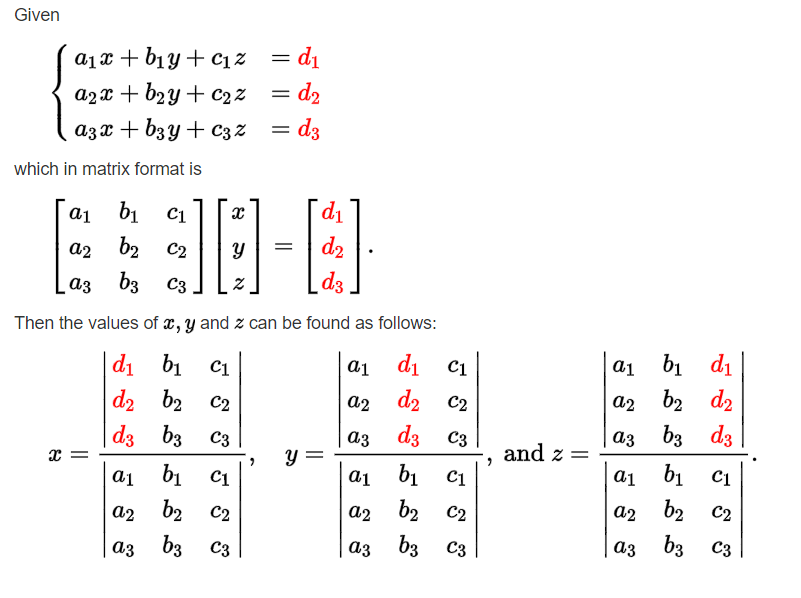

In [1]:
from IPython.display import Image
Image('final-2.png')

##### example 1
1. 2w - x + 5y + z = -3
2. 3w + 2x +2y -6z = -32
3. w + 3x +3y - z = -47
4. 5w -2x - 3y + 3z = 49

In [55]:
#Drivers code 
if __name__ == "__main__": 
  
    mat=[[2,-1,5,1,-3],[3,2,2,-6,-32],[1,3,3,-1,-47],[5,-2,-3,3,49]] 
    N=len(mat) 
    print("Determinant of the matrix is : ",determinantOfMatrix(mat,N))
    
A=[[2,-1,5,1],[3,2,2,-6],[1,3,3,-1],[5,-2,-3,3]]
B=[-3,-32,-47,49]
C=[[2,-1,5,1],[3,2,2,-6],[1,3,3,-1],[5,-2,-3,3]]
X=[]
for k in range(0,len(B)):
    for u in range(0,len(B)):
        C[u][k]=B[u]
        if k>0:
            C[u][k-1]=A[u][k-1]
    X.append(round(linalg.det(C)/linalg.det(A),1))
 
print('w=%s'%X[0],'x=%s'%X[1],'y=%s'%X[2],'z=%s'%X[3])

Determinant of the matrix is :  684
w=2.0 x=-12.0 y=-4.0 z=1.0


In [51]:
linalg.det(C)

684.0000000000005

In [52]:
linalg.det(A)

683.9999999999998

In [42]:
#check
a = np.array([[2,-1,5,1],[3,2,2,-6],[1,3,3,-1],[5,-2,-3,3]])
b = np.array([-3,-32,-47,49])
x = np.linalg.solve(a, b)
print(x)

[  2. -12.  -4.   1.]


##### example 2


1. 6w + x + y + 2z = -3
2. 4w - 2x +5y + 4z = -30
3. 2w + 8x +7y + 5z = -15
4. 2w + 4x - 3y + z = 40

In [37]:
A=[[6,1,1,2], [4, -2, 5,4], [2,8,7,5],[2,4,-3,1]]
B=[-3,-30,-15,40]
C=[[6,1,1,2], [4, -2, 5,4], [2,8,7,5],[2,4,-3,1]]
X=[]
for k in range(0,len(B)):
    for u in range(0,len(B)):
        C[u][k]=B[u]
        if k>0:
            C[u][k-1]=A[u][k-1]
    X.append(round(linalg.det(C)/linalg.det(A),1))
 
print('w=%s'%X[0],'x=%s'%X[1],'y=%s'%X[2],'z=%s'%X[3])

w=-1.6 x=2.3 y=-9.1 z=6.6


In [38]:
#check
a = np.array([[6,1,1,2], [4, -2, 5,4], [2,8,7,5],[2,4,-3,1]])
b = np.array([-3,-30,-15,40])
x = np.linalg.solve(a, b)
print(x)

[-1.57083333  2.34166667 -9.06666667  6.575     ]


##### example 3
1. 5x + y + 3z - w= -3
2. 3x + 5y - z +6w = 6
3. 2x - y + 7z +5w = -1
4. 2x + 4y -3z +4w = 13

In [40]:
A=[[5,1,3,-1], [3,5,-1,6], [2,-1,7,5],[2,4,-3,4]]
B=[-3,6,-1,13]
C=[[5,1,3,-1], [3,5,-1,6], [2,-1,7,5],[2,4,-3,4]]
X=[]
for k in range(0,len(B)):
    for u in range(0,len(B)):
        C[u][k]=B[u]
        if k>0:
            C[u][k-1]=A[u][k-1]
    X.append(round(linalg.det(C)/linalg.det(A),1))
 
print('w=%s'%X[0],'x=%s'%X[1],'y=%s'%X[2],'z=%s'%X[3])

w=6.1 x=-9.3 y=-6.5 z=4.6


In [41]:
#check
a = np.array([[5,1,3,-1], [3,5,-1,6], [2,-1,7,5],[2,4,-3,4]])
b = np.array([-3,6,-1,13])
x = np.linalg.solve(a, b)
print(x)

[ 6.09661836 -9.30917874 -6.51690821  4.62318841]


# outsources

In [33]:
import copy
from fractions import Fraction
 
def gauss(a, b):
    a = copy.deepcopy(a)
    b = copy.deepcopy(b)
    n = len(a)
    p = len(b[0])
    det = 1
    for i in range(n - 1):
        k = i
        for j in range(i + 1, n):
            if abs(a[j][i]) > abs(a[k][i]):
                k = j
        if k != i:
            a[i], a[k] = a[k], a[i]
            b[i], b[k] = b[k], b[i]
            det = -det
 
        for j in range(i + 1, n):
            t = a[j][i]/a[i][i]
            for k in range(i + 1, n):
                a[j][k] -= t*a[i][k]
            for k in range(p):
                b[j][k] -= t*b[i][k]
 
    for i in range(n - 1, -1, -1):
        for j in range(i + 1, n):
            t = a[i][j]
            for k in range(p):
                b[i][k] -= t*b[j][k]
        t = 1/a[i][i]
        det *= a[i][i]
        for j in range(p):
            b[i][j] *= t
    return det, b
 
def zeromat(p, q):
    return [[0]*q for i in range(p)]
 
def matmul(a, b):
    n, p = len(a), len(a[0])
    p1, q = len(b), len(b[0])
    if p != p1:
        raise ValueError("Incompatible dimensions")
    c = zeromat(n, q)
    for i in range(n):
        for j in range(q):
                c[i][j] = sum(a[i][k]*b[k][j] for k in range(p))
    return c
 
 
def mapmat(f, a):
    return [list(map(f, v)) for v in a]
 
def ratmat(a):
    return mapmat(Fraction, a)
 
# As an example, compute the determinant and inverse of 3x3 magic square
 
a = [[1, 1, -3], [1, -1, 2], [2, 1, -1]]
b = [[-10, 0,0],[0,3,0],[0,0,-6]]
det, c = gauss(a, b)
 
det

-5.0